In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

,Company,Job,Salary,Location
0,Sendo.vn,Data Analyst - Monthly,14,HCM
1,Profectus Group,Data Analyst - Monthly,11,HCM
2,VNG,Data Analyst - Monthly,8,HCM
3,VPB Finance,Data Analyst - Monthly,17,HCM
4,FPT Software,Data Analyst - Monthly Intern,4,HCM
...,...,...,...,...
36,Tri Nam,Data Science - Monthly,12,HN
37,SPi Global,Data Entry - Monthly,4,HN
38,Techcombank,Data Engineer - Monthly,14,HN
43,DAC,Data Engineer - Monthly Intern,9,HN


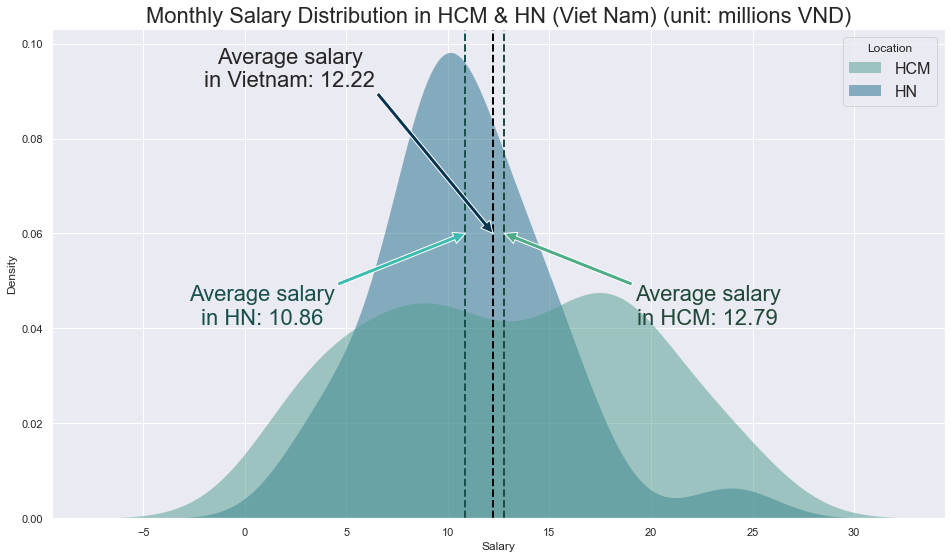

In [36]:
HCM = pd.read_excel('HCMSalary.xlsx', index_col=0, sheet_name='Sheet1')
HCM = HCM[HCM['Job'].str.contains("Monthly")]
HCM['Salary'] = HCM['Salary'].str.extract('(\d+)')
HCM['Salary'] = HCM['Salary'].astype('int')
HCM['Location'] = ['HCM' for i in range(len(HCM))]
HCM = HCM[HCM['Salary'] < np.quantile(HCM['Salary'],0.75)*1.5]

HN = pd.read_excel('HNSalary.xlsx', index_col=0, sheet_name='Sheet1')
HN = HN[HN['Job'].str.contains("Monthly")]
HN['Salary'] = HN['Salary'].str.extract('(\d+)')
HN['Salary'] = HN['Salary'].astype('int')
HN['Location'] = ['HN' for i in range(len(HN))]
HN = HN[HN['Salary'] < np.quantile(HN['Salary'],0.75)*1.5]

HCM_HN = HCM.append(HN)
display(HCM_HN)
sns.set(rc={'figure.figsize':(16,9), 'legend.fontsize':16})

fig = sns.kdeplot(
   data=HCM_HN, x='Salary', hue="Location",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
fig.axvline(x= HCM['Salary'].mean(), ls='--', linewidth=2, c='#214939')
fig.annotate('Average salary\nin HCM: {}'.format(round(HCM['Salary'].mean(), 2)), ha = 'center', va = 'bottom',
             xytext = (HCM['Salary'].mean() + 2*(fig.get_xticks()[1]-fig.get_xticks()[0]), fig.get_yticks()[-1]*2/6),
             xy = (HCM['Salary'].mean(), fig.get_yticks()[-1]/2), arrowprops = {'facecolor' : '#4dac86'},
            fontsize = 22, c='#214939')

fig.axvline(x= HN['Salary'].mean(), ls='--', linewidth=2, c='#1a504b')
fig.annotate('Average salary\nin HN: {}'.format(round(HN['Salary'].mean(), 2)), ha = 'center', va = 'bottom',
             xytext = (HN['Salary'].mean() - 2*(fig.get_xticks()[1]-fig.get_xticks()[0]), fig.get_yticks()[-1]*2/6),
             xy = (HN['Salary'].mean(), fig.get_yticks()[-1]/2), arrowprops = {'facecolor' : '#3ebbb0'},
            fontsize = 22, c='#1a504b')

fig.axvline(x= HCM_HN['Salary'].mean(), ls='--', linewidth=2, c='#000000')
fig.annotate('Average salary\nin Vietnam: {}'.format(round(HCM_HN['Salary'].mean(), 2)), ha = 'center', va = 'bottom',
             xytext = (HCM_HN['Salary'].mean() - 2*(fig.get_xticks()[1]-fig.get_xticks()[0]), fig.get_yticks()[-1]*3/4),
             xy = (HCM_HN['Salary'].mean(), fig.get_yticks()[-1]/2), arrowprops = {'facecolor' : '#063551'},
            fontsize = 22)
fig.set_title('Monthly Salary Distribution in HCM & HN (Viet Nam) (unit: millions VND)', fontsize = 22)

plt.savefig('HCM_HNSalary1.jpeg')
plt.show()

,Company,Job,Salary,Location
0,Applied Systems,Data Analyst,63.111,Toronto
1,Fugro,Data Analyst,46.135,Toronto
3,Deloitte,Data Analyst,67.162,Toronto
4,University Health Network,Data Analyst,62.898,Toronto
5,Cognizant Technology Solutions,Data Analyst,37.602,Toronto
...,...,...,...,...
175,IQVIA,Clinical Data Analyst - Contractor,75.000,Ottawa
176,RBC,Senior Data Scientist,79.000,Ottawa
177,Government of Canada,Senior Data Scientist,99.000,Ottawa
178,Self,Senior Data Scientist,90.000,Ottawa


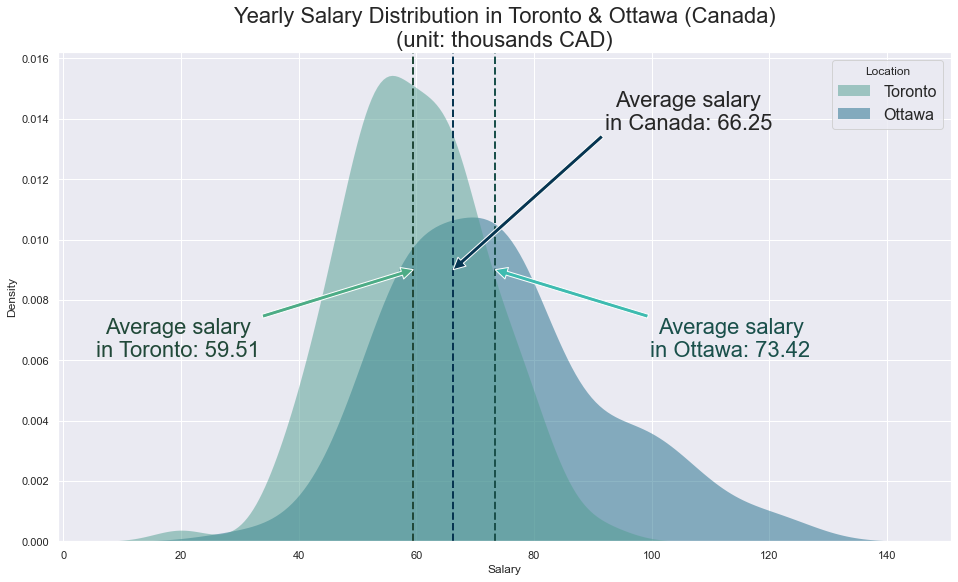

In [28]:
TRT = pd.read_excel('TorontoSalary.xlsx', index_col=0, sheet_name='Sheet1')
TRT['Salary'] = TRT['Salary'].str.replace(',', '')
TRT = TRT[~TRT['Job'].str.contains("Hourly")]
TRT = TRT[~TRT['Job'].str.contains("Monthly")]
TRT['Salary'] = TRT['Salary'].str.replace('K', '000')
TRT['Salary'] = TRT['Salary'].str.extract('(\d+)')
TRT['Salary'] = TRT['Salary'].astype(float)
TRT['Salary'] = TRT['Salary']/1000
TRT['Location'] = ["Toronto" for i in range(len(TRT))]
TRT = TRT[TRT['Salary'] < np.quantile(TRT['Salary'],0.75)*1.5]

OTW = pd.read_excel('OttawaSalary.xlsx', index_col=0, sheet_name='Sheet1')
OTW['Salary'] = OTW['Salary'].str.replace(',', '')
OTW = OTW[~OTW['Job'].str.contains("Hourly")]
OTW = OTW[~OTW['Job'].str.contains("Monthly")]
OTW['Salary'] = OTW['Salary'].str.replace('K', '000')
OTW['Salary'] = OTW['Salary'].str.extract('(\d+)')
OTW['Salary'] = OTW['Salary'].astype(float)
OTW['Salary'] = OTW['Salary']/1000
OTW['Location'] = ["Ottawa" for i in range(len(OTW))]
OTW = OTW[OTW['Salary'] < np.quantile(OTW['Salary'],0.75)*1.5]

TRT_OTW = TRT.append(OTW)
# TRT_OTW['Salary'] = TRT_OTW['Salary']/1000
display(TRT_OTW)
fig = sns.kdeplot(
   data=TRT_OTW, x='Salary', hue="Location",
   fill=True, common_norm=True, palette="crest",
   alpha=.5, linewidth=0
)
fig.axvline(x= TRT['Salary'].mean(), ls='--', linewidth=2, c='#214939')
fig.annotate('Average salary\nin Toronto: {}'.format(round(TRT['Salary'].mean(), 2)), ha = 'center', va = 'bottom',
             xytext = (TRT['Salary'].mean() - 2*(fig.get_xticks()[1]-fig.get_xticks()[0]), fig.get_yticks()[-1]*2/6),
             xy = (TRT['Salary'].mean(), fig.get_yticks()[-1]/2), arrowprops = {'facecolor' : '#4dac86'},
            fontsize = 22, c='#214939')

fig.axvline(x= OTW['Salary'].mean(), ls='--', linewidth=2, c='#1a504b')
fig.annotate('Average salary\nin Ottawa: {}'.format(round(OTW['Salary'].mean(), 2)), ha = 'center', va = 'bottom',
             xytext = (OTW['Salary'].mean() + 2*(fig.get_xticks()[1]-fig.get_xticks()[0]), fig.get_yticks()[-1]*2/6),
             xy = (OTW['Salary'].mean(), fig.get_yticks()[-1]/2), arrowprops = {'facecolor' : '#3ebbb0'},
            fontsize = 22, c='#1a504b')

fig.axvline(x= TRT_OTW['Salary'].mean(), ls='--', linewidth=2, c='#063551')
fig.annotate('Average salary\nin Canada: {}'.format(round(TRT_OTW['Salary'].mean(), 2)), ha = 'center', va = 'bottom',
             xytext = (TRT_OTW['Salary'].mean() + 2*(fig.get_xticks()[1]-fig.get_xticks()[0]), fig.get_yticks()[-1]*3/4),
             xy = (TRT_OTW['Salary'].mean(), fig.get_yticks()[-1]/2), arrowprops = {'facecolor' : '#063551'}, fontsize = 22)
fig.set_title('Yearly Salary Distribution in Toronto & Ottawa (Canada)\n(unit: thousands CAD)', fontsize = 22)
plt.savefig('TRT_OTWSalary1.jpeg')
plt.show()

,Company,Job,Salary,Location
0,Tata Consultancy Services,Data Analyst,76.787,New York
1,Meta,Data Analyst,114.621,New York
2,Rutgers University,Data Analyst,84.000,New York
3,Morgan Stanley,Data Analyst,82.170,New York
4,Tata Consultancy Services (North America),Data Analyst,75.199,New York
...,...,...,...,...
175,Microsoft,Data Analyst,51.000,San Francisco
176,Arcadis,Data Analyst,53.000,San Francisco
177,2Dream,Data Analyst,73.000,San Francisco
178,Stride Health,Data Analyst,100.000,San Francisco


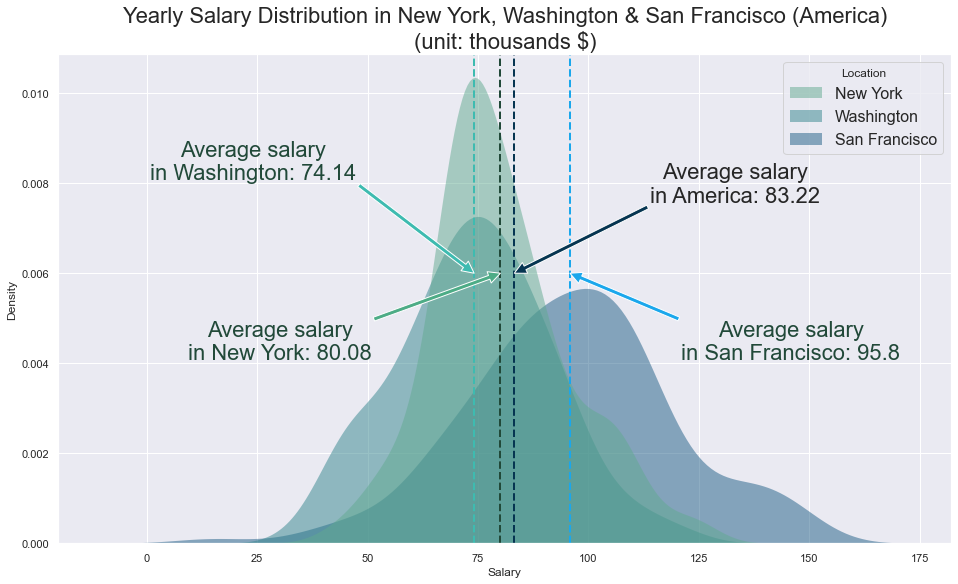

In [37]:
NY = pd.read_excel('NewYorkSalary.xlsx', index_col=0, sheet_name='Sheet1')
NY['Salary'] = NY['Salary'].str.replace(',', '')
NY = NY[~NY['Job'].str.contains("Hourly")]
NY = NY[~NY['Job'].str.contains("Monthly")]
NY['Salary'] = NY['Salary'].str.replace('K', '000')
NY['Salary'] = NY['Salary'].str.extract('(\d+)')
NY['Salary'] = NY['Salary'].astype(float)
NY['Salary'] = NY['Salary']/1000
NY['Location'] = ["New York" for i in range(len(NY))]
NY = NY[NY['Salary'] < np.quantile(NY['Salary'],0.75)*1.5]


WST = pd.read_excel('WashingtonSalary.xlsx', index_col=0, sheet_name='Sheet1')
WST['Salary'] = WST['Salary'].str.replace(',', '')
WST = WST[~WST['Job'].str.contains("Hourly")]
WST = WST[~WST['Job'].str.contains("Monthly")]
WST['Salary'] = WST['Salary'].str.replace('K', '000')
WST['Salary'] = WST['Salary'].str.extract('(\d+)')
WST['Salary'] = WST['Salary'].astype(float)
WST['Salary'] = WST['Salary']/1000
WST['Location'] = ["Washington" for i in range(len(WST))]
WST = WST[WST['Salary'] < np.quantile(WST['Salary'],0.75)*1.5]

SF = pd.read_excel('SanFanciscoSalary.xlsx', index_col=0, sheet_name='Sheet1')
SF['Salary'] = SF['Salary'].str.replace(',', '')
SF = SF[~SF['Job'].str.contains("Hourly")]
SF = SF[~SF['Job'].str.contains("Monthly")]
SF['Salary'] = SF['Salary'].str.replace('K', '000')
SF['Salary'] = SF['Salary'].str.extract('(\d+)')
SF['Salary'] = SF['Salary'].astype(float)
SF['Salary'] = SF['Salary']/1000
SF['Location'] = ["San Francisco" for i in range(len(SF))]
SF = SF[SF['Salary'] < np.quantile(SF['Salary'],0.75)*1.5]

America = NY.append([WST,SF])
# America['Salary'] = America['Salary']/1000
display(America)
fig = sns.kdeplot(
   data=America, x='Salary', hue="Location",
   fill=True, common_norm=True, palette="crest",
   alpha=.5, linewidth=0
)
fig.axvline(x= NY['Salary'].mean(), ls='--', linewidth=2, c='#214939')
fig.annotate('Average salary\nin New York: {}'.format(round(NY['Salary'].mean(), 2)), ha = 'center', va = 'bottom',
             xytext = (NY['Salary'].mean() - 2*(fig.get_xticks()[1]-fig.get_xticks()[0]), fig.get_yticks()[-1]*2/6),
             xy = (NY['Salary'].mean(), fig.get_yticks()[-1]/2), arrowprops = {'facecolor' : '#4dac86'},
            fontsize = 22, c='#214939')

fig.axvline(x= WST['Salary'].mean(), ls='--', linewidth=2, c='#3ebbb0')
fig.annotate('Average salary\nin Washington: {}'.format(round(WST['Salary'].mean(), 2)), ha = 'center', va = 'bottom',
             xytext = (WST['Salary'].mean() - 2*(fig.get_xticks()[1]-fig.get_xticks()[0]), fig.get_yticks()[-1]*4/6),
             xy = (WST['Salary'].mean(), fig.get_yticks()[-1]/2), arrowprops = {'facecolor' : '#3ebbb0'},
            fontsize = 22, c='#214939')

fig.axvline(x= SF['Salary'].mean(), ls='--', linewidth=2, c='#1aa7ec')
fig.annotate('Average salary\nin San Francisco: {}'.format(round(SF['Salary'].mean(), 2)), ha = 'center', va = 'bottom',
             xytext = (SF['Salary'].mean() + 2*(fig.get_xticks()[1]-fig.get_xticks()[0]), fig.get_yticks()[-1]*2/6),
             xy = (SF['Salary'].mean(), fig.get_yticks()[-1]/2), arrowprops = {'facecolor' : '#1aa7ec'},
            fontsize = 22, c='#214939')

fig.axvline(x= America['Salary'].mean(), ls='--', linewidth=2, c='#063551')
fig.annotate('Average salary\nin America: {}'.format(round(America['Salary'].mean(), 2)), ha = 'center', va = 'bottom',
             xytext = (America['Salary'].mean() + 2*(fig.get_xticks()[1]-fig.get_xticks()[0]), fig.get_yticks()[-1]*2.5/4),
             xy = (America['Salary'].mean(), fig.get_yticks()[-1]/2), arrowprops = {'facecolor' : '#063551'}, fontsize = 22)
fig.set_title('Yearly Salary Distribution in New York, Washington & San Francisco (America)\n(unit: thousands $)', fontsize = 22)
plt.savefig('AmericaSalary1.jpeg')
plt.show()

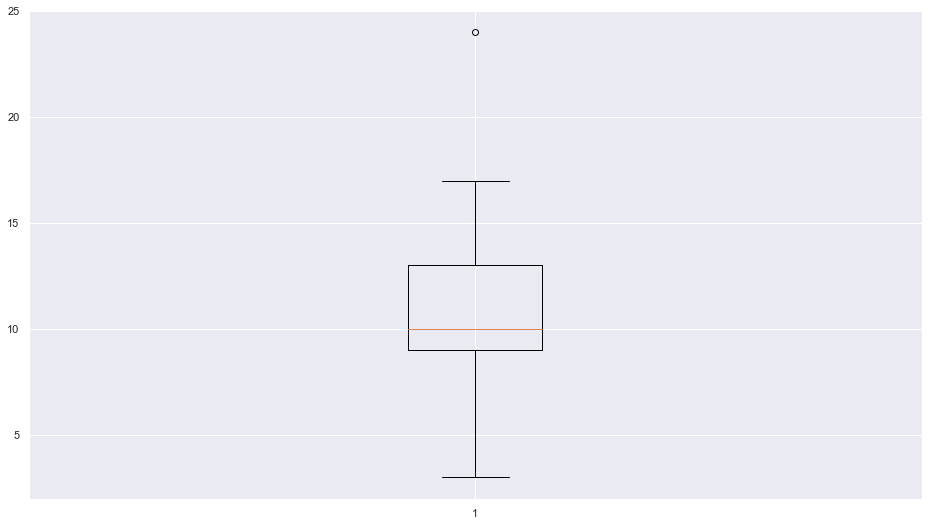

In [5]:
a = plt.boxplot(HN['Salary'])
plt.show()

In [6]:
np.quantile(HN['Salary'], 0.75)*1.5

19.5

In [7]:
SF['Salary'].max()

147126.0

In [8]:
display(HCM['Salary'].mean(),
HN['Salary'].mean(),
TRT['Salary'].mean(),
OTW['Salary'].mean(),
NY['Salary'].mean(),
WST['Salary'].mean(),
SF['Salary'].mean())


12.785714285714286

10.862068965517242

59506.65

73420.96460176991

80083.35625

74142.10666666667

95804.17567567568

In [9]:
HN[HN['Salary'] == HN['Salary'].max()]

,Company,Job,Salary,Location
22,TEKO Vietnam,Data Engineer - Monthly,24,HN
